# Анализ поведения пользователей в мобильном приложении 

## Описание проекта

Вы работаете в стартапе, который продаёт продукты питания. Нужно разобраться, как ведут себя пользователи вашего мобильного приложения. 

Изучите воронку продаж. Узнайте, как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах? На каких именно?

После этого исследуйте результаты A/A/B-эксперимента. Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста. Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. Выясните, какой шрифт лучше.
Создание двух групп A вместо одной имеет определённые преимущества. Если две контрольные группы окажутся равны, вы можете быть уверены в точности проведенного тестирования. Если же между значениями A и A будут существенные различия, это поможет обнаружить факторы, которые привели к искажению результатов. Сравнение контрольных групп также помогает понять, сколько времени и данных потребуется для дальнейших тестов.

В случае общей аналитики и A/A/B-эксперимента работайте с одними и теми же данными. В реальных проектах всегда идут эксперименты. Аналитики исследуют качество работы приложения по общим данным, не учитывая принадлежность пользователей к экспериментам.

**Изучите и проверьте данные**

* Сколько всего событий в логе?
* Сколько всего пользователей в логе?
* Сколько в среднем событий приходится на пользователя?
* Данными за какой период вы располагаете? Найдите максимальную и минимальную дату. Постройте гистограмму по дате и времени. Можно ли быть уверенным, что у вас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определите, с какого момента данные полные и отбросьте более старые. Данными за какой период времени вы располагаете на самом деле?
* Много ли событий и пользователей вы потеряли, отбросив старые данные?
* Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп.

**Изучите воронку событий**

* Посмотрите, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте.
* Посчитайте, сколько пользователей совершали каждое из этих событий. Отсортируйте события по числу пользователей. Посчитайте долю пользователей, которые хоть раз совершали событие.
* Предположите, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.
* По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитайте отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.
* На каком шаге теряете больше всего пользователей?
* Какая доля пользователей доходит от первого события до оплаты?

**Изучите результаты эксперимента**

* Сколько пользователей в каждой экспериментальной группе?
* Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверьте, находят ли статистические критерии разницу между выборками 246 и 247.
* Выберите самое популярное событие. Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп. Посчитайте долю пользователей, совершивших это событие. Проверьте, будет ли отличие между группами статистически достоверным. Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?
* Аналогично поступите с группой с изменённым шрифтом. Сравните результаты с каждой из контрольных групп в отдельности по каждому событию. Сравните результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?
* Какой уровень значимости вы выбрали при проверке статистических гипотез выше? Посчитайте, сколько проверок статистических гипотез вы сделали. При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Какой уровень значимости стоит применить? Если вы хотите изменить его, проделайте предыдущие пункты и проверьте свои выводы.

## Описание данных

Каждая запись в логе — это действие пользователя, или событие. 

* EventName — **название события;**
* DeviceIDHash — **уникальный идентификатор пользователя;**
* EventTimestamp — **время события;**
* ExpId — **номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.**

## Работа с проектом

### Открываю файл с данными и изучаю общую информацию

**Импортирую все необходимые библиотеки для проекта**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import math as mth
import matplotlib.ticker as mtick
import warnings
import plotly.express as px
from plotly import graph_objects as go
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', False)

**Открываю файлы с данными**

In [2]:
df = pd.read_csv('/datasets/logs_exp.csv', sep='\t')

**Вывожу на экран первые 10 строк таблиц, изучаю данные**

In [3]:
display(df.head(10))

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
5,CartScreenAppear,6217807653094995999,1564055323,248
6,OffersScreenAppear,8351860793733343758,1564066242,246
7,MainScreenAppear,5682100281902512875,1564085677,246
8,MainScreenAppear,1850981295691852772,1564086702,247
9,MainScreenAppear,5407636962369102641,1564112112,246


**Вывожу сводную информацию о таблице**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


**Пропусков в таблице нет, названия столбцов необходимо изменить для удобства**

### Подготовка данных

**Переименовываю столбцы**

In [5]:
df = df.rename(
    columns={
        'EventName':'event_name',
        'DeviceIDHash':'user_id',
        'EventTimestamp':'event_time',
        'ExpId':'group'
    }
)

**Добавляю столбец даты и времени**

In [6]:
df['datetime'] = pd.to_datetime(df['event_time'], unit='s')

**Добавляю столбец только с датов без времени**

In [7]:
df['date'] = df['datetime'].dt.date

**Проверяю проедланные выше действия**

In [8]:
display(df.head(10))
df.info()

,event_name,user_id,event_time,group,datetime,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25
5,CartScreenAppear,6217807653094995999,1564055323,248,2019-07-25 11:48:43,2019-07-25
6,OffersScreenAppear,8351860793733343758,1564066242,246,2019-07-25 14:50:42,2019-07-25
7,MainScreenAppear,5682100281902512875,1564085677,246,2019-07-25 20:14:37,2019-07-25
8,MainScreenAppear,1850981295691852772,1564086702,247,2019-07-25 20:31:42,2019-07-25
9,MainScreenAppear,5407636962369102641,1564112112,246,2019-07-26 03:35:12,2019-07-26


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event_name  244126 non-null  object        
 1   user_id     244126 non-null  int64         
 2   event_time  244126 non-null  int64         
 3   group       244126 non-null  int64         
 4   datetime    244126 non-null  datetime64[ns]
 5   date        244126 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 11.2+ MB


In [9]:
df['date'] = df['datetime'].astype('datetime64[D]')

**Изменяю названия групп в столбе group с `246`, `247` и `248` на `A1`, `A2` и `B` соответственно**

In [10]:
df['group'] = df['group'].replace(246, 'A1')
df['group'] = df['group'].replace(247, 'A2')
df['group'] = df['group'].replace(248, 'B')

**Проверяю таблицу на наличие дубликатов**

In [11]:
df.duplicated().sum()

413

**Удаляю явные дубликаты**

In [12]:
df = df.drop_duplicates().reset_index(drop=True)

**Проверяю итоговые данные готовой таблицы**

In [13]:
display(df.head(10))
df.info()

,event_name,user_id,event_time,group,datetime,date
0,MainScreenAppear,4575588528974610257,1564029816,A1,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,A1,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,B,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,B,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,B,2019-07-25 11:48:42,2019-07-25
5,CartScreenAppear,6217807653094995999,1564055323,B,2019-07-25 11:48:43,2019-07-25
6,OffersScreenAppear,8351860793733343758,1564066242,A1,2019-07-25 14:50:42,2019-07-25
7,MainScreenAppear,5682100281902512875,1564085677,A1,2019-07-25 20:14:37,2019-07-25
8,MainScreenAppear,1850981295691852772,1564086702,A2,2019-07-25 20:31:42,2019-07-25
9,MainScreenAppear,5407636962369102641,1564112112,A1,2019-07-26 03:35:12,2019-07-26


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243713 entries, 0 to 243712
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event_name  243713 non-null  object        
 1   user_id     243713 non-null  int64         
 2   event_time  243713 non-null  int64         
 3   group       243713 non-null  object        
 4   datetime    243713 non-null  datetime64[ns]
 5   date        243713 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 11.2+ MB


**Дубликаты во всех столбцах удалены, добавлено 2 новых столбца, изменены типы данных столбцов, переименованы все столбцы, перименованы названия групп, можно приступать к следюущему этапу**

## Изучение и проверка данных

**Вывожу на экране количество событий в логе**

In [14]:
print(df['event_name'].count())

243713


**Вывожу на экран более подобную информацию о событиях в логе**

In [15]:
df['event_name'].value_counts()

MainScreenAppear           119101
OffersScreenAppear         46808 
CartScreenAppear           42668 
PaymentScreenSuccessful    34118 
Tutorial                   1018  
Name: event_name, dtype: int64

**Всего 5 уникальных событий, из них больше всего `MainScreenAppear`**

**Вывожу на экране количество пользователей в логе**

In [16]:
unique_user_id = df['user_id'].nunique()
print(unique_user_id)

7551


**Вывожу на экран средее число событий на одного пользователя**

In [17]:
events_sum = (df['event_name'].count()) / unique_user_id
print(events_sum.round())

32.0


**Определяю минимальную и максимальную даты логов**

In [18]:
print(df['date'].min())
print(df['date'].max())

2019-07-25 00:00:00
2019-08-07 00:00:00


**Самая ранняя дата: 25 июля 2019 года**

**Самая поздняя дата: 7 августа 2019 года**

**Строю гистограмму по дате и времени**

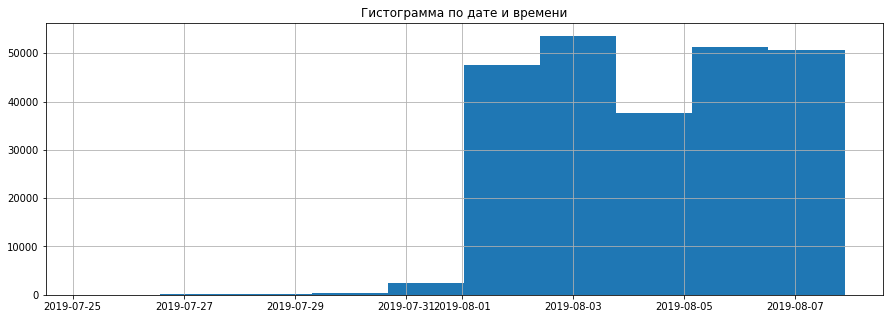

In [19]:
plt.figure(figsize=(15,5))
df['datetime'].hist(bins=10)
plt.title('Гистограмма по дате и времени')
plt.show()

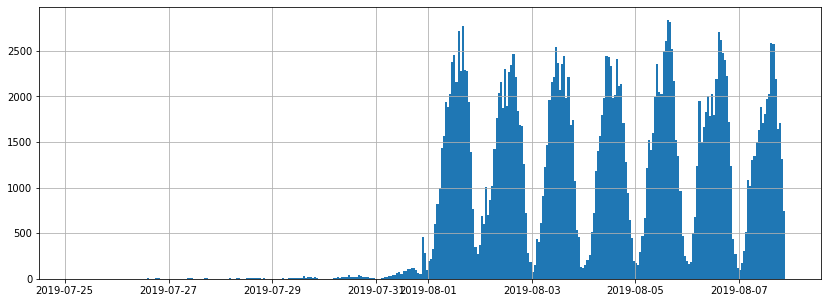

In [20]:
df['datetime'].hist(bins=14*24, figsize=(14, 5));

**Судя по гистограмме, большинство данных мы имеем за пероди с 1 августа, поэтому стоит отбросить данные, которых мало**

In [21]:
df_user_id = df['user_id'].nunique()
df_event_name = df['event_name'].count()
print(df_user_id)
print(df_event_name)

7551
243713


**Удаляю неполные данные за период до 1 августа**

In [22]:
df = df.loc[df['date'] > '2019-07-31']

**Строю гистограмму по дате и времени после удаления части данных, проверяю**

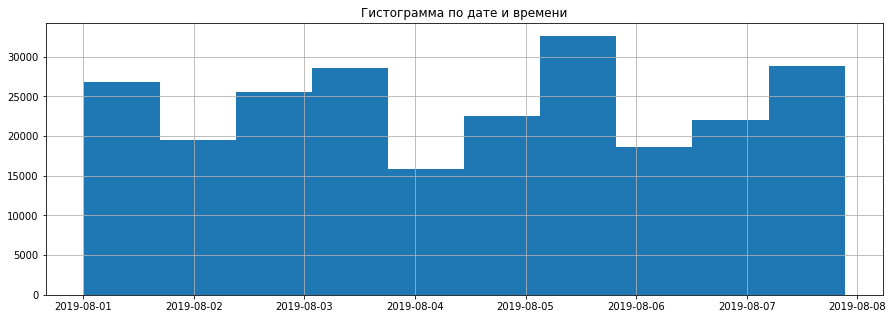

In [23]:
plt.figure(figsize=(15,5))
df['datetime'].hist(bins=10)
plt.title('Гистограмма по дате и времени')
plt.show()

**Данные корректно удалены. Теперь я работаю с данными, начиная с 1 августа. Оцениваю количество потерянных данных**

In [24]:
df_new_user_id = df['user_id'].nunique()
df_new_event = df['event_name'].count()
print(df_new_user_id)
print(df_new_event)

7534
240887


**До удаления данных было 7551 пользователей, после удаления данных стало 7534, утеряно 17 пользователей. До удаления данных было 243713 событий, после удаления данных стало 240887, утеряно 2826 событий**

In [25]:
print('Потеряно', (df_event_name - df_new_event), 'событий, что составляет', ((df_event_name - df_new_event)/df_event_name*100).round(1), '%')

Потеряно 2826 событий, что составляет 1.2 %


In [26]:
print('Потеряно', (df_user_id - df_new_user_id), 'пользователей, что составляет', ((df_user_id - df_new_user_id)/df_user_id*100), '%')

Потеряно 17 пользователей, что составляет 0.22513574361011784 %


**Проверяю количество пользователей из каждой экспеттментальной группы**

In [27]:
df.groupby('group')['user_id'].nunique()

group
A1    2484
A2    2513
B     2537
Name: user_id, dtype: int64

**В каждой экспериментальной группе есть примерно 2500 пользователей. Можем переходить к следующему этапу**

## Изучение воронки событий

**Сортирую события по частоте**

In [28]:
df['event_name'].value_counts()

MainScreenAppear           117328
OffersScreenAppear         46333 
CartScreenAppear           42303 
PaymentScreenSuccessful    33918 
Tutorial                   1005  
Name: event_name, dtype: int64

События:
* MainScreenAppear - появление главного экрана (117328)
* OffersScreenAppear - появление экрана предложений (46333)
* CartScreenAppear - появление экрана корзины (42303)
* PaymentScreenSuccessful - экран успешной оплаты (33918)
* Tutorial - обучение (1005)

**Считаю, сколько пользователей совершали каждое из этих событий**

In [29]:
events_users = df.groupby('event_name')['user_id'].nunique().sort_values(ascending=False).reset_index().rename(columns={'user_id': 'total_users'})
events_users['percent'] = (events_users['total_users'] / df['user_id'].nunique() * 100)
display(events_users)

,event_name,total_users,percent
0,MainScreenAppear,7419,98.473586
1,OffersScreenAppear,4593,60.963632
2,CartScreenAppear,3734,49.561986
3,PaymentScreenSuccessful,3539,46.973719
4,Tutorial,840,11.149456


**Предполагаю, в каком порядке происходят события**

Как вы видим из предыдущей таблицы, событие `Tutorial` используется лишь 11%, можно было бы предположить, что оно находится самым последним пунктом в цепочке, но это не так. Обычно `Tutorial` пропускают пользователи, предполагая, что смогут разобраться с приложением самостоятельно, поэтому я предполагаю, что порядок действий следующий: `MainScreenAppear` --> `Tutorial` --> `OffersScreenAppear` --> `CartScreenAppear` --> `PaymentScreenSuccessful`

**Считаю, какая доля пользователей проходит на следующий шаг воронки**

**Для начала следует исключить действие `Tutorial`, так как его пропускает большинство пользователей**

In [30]:
df = df.query('event_name != "Tutorial"')

**Проверяю таблицу без `Tutorial`, задаю переменную `df_groupby`**

In [31]:
df_groupby = df.groupby('event_name')['user_id'].nunique().sort_values(ascending=False)
print(df_groupby)

event_name
MainScreenAppear           7419
OffersScreenAppear         4593
CartScreenAppear           3734
PaymentScreenSuccessful    3539
Name: user_id, dtype: int64


**Считаю, какая доля пользователей переходит на следующий шаг воронки**

In [32]:
print((df_groupby[1]/df_groupby[0] * 100))
print((df_groupby[2]/df_groupby[1] * 100))
print((df_groupby[3]/df_groupby[2] * 100))

61.908613020622724
81.29762682342695
94.7777182645956


In [33]:
event_funnel = df.groupby('event_name')['user_id'].nunique().reset_index()
event_percent = event_funnel.sort_values(by='user_id',ascending=False)
event_percent['percent'] = event_percent['user_id']/event_percent['user_id'].shift(1)
event_percent['percent'] = (event_percent['percent'] * 100).map('{0:.2f}%'.format)
display(event_percent)

,event_name,user_id,percent
1,MainScreenAppear,7419,nan%
2,OffersScreenAppear,4593,61.91%
0,CartScreenAppear,3734,81.30%
3,PaymentScreenSuccessful,3539,94.78%


62% пользователей переходит с главного экрана на экран предложений. 81% пользователей переходит с экрана предложений на экран появления корзины. 94% пользователей переходит с экрана появления корзины на экран успешной оплаты. Больше всего пользователей теряется при переходе с главного экрана на экран предложений, теряется 38% пользователей

**Считаю количество пользователей, которое доходит с первого этапа до последнего**

In [34]:
print((df_groupby[3]/df_groupby[0] * 100))

47.70184661005526


## Изучение результатов эксперимента

**Считаю количество пользователей в каждой экспериментальной группе**

In [35]:
users_group = df.groupby('group')['user_id'].nunique()
users_group['A1+A2'] = users_group['A1'] + users_group['A2']
print(users_group)

group
A1       2483
A2       2512
B        2535
A1+A2    4995
Name: user_id, dtype: int64


**Проверяю, находят ли статистические критерии разницу между выборками 246(A1) и 247(A2)**

Критерии успешного A/A-теста: 
* Количество пользователей в различных группах различается не более, чем на 1%;
* Для всех групп фиксируют и отправляют в системы аналитики данные об одном и том же;
* Различие ключевых метрик по группам не превышает 1% и не имеет статистической значимости;
* Попавший в одну из групп посетитель остаётся в этой группе до конца теста. Если пользователь видит разные версии исследуемой страницы в ходе одного исследования, неизвестно, какая именно повлияла на его решения. Значит, и результаты такого теста нельзя интерпретировать однозначно.

In [36]:
A1 = (df[df['group'] == 'A1']['user_id']).nunique()
A2 = (df[df['group'] == 'A2']['user_id']).nunique()
print(100 - A1 / A2 * 100)

1.1544585987261087


Количество пользователей между группами А1 и А2 отличаются более, чем на 1%, что не является успешным А/А тестом

**Группирую данные, задаю переменную `df_group`, считаю число пользователей, совершивших событие `MainScreenAppear` в каждой из групп**

In [37]:
df_group = df.pivot_table(index='event_name', values='user_id', columns='group',aggfunc=lambda x: len(x.unique()))
display(df_group.sort_values(by='A1', ascending=False))

group,A1,A2,B
event_name,,,
MainScreenAppear,2450,2476,2493
OffersScreenAppear,1542,1520,1531
CartScreenAppear,1266,1238,1230
PaymentScreenSuccessful,1200,1158,1181


Самым популярным событием во всех группах явялется появление главного экрана

**Строю таблицу, в которой будет видно более детально, сколько пользователей из каждой группы совершали каждое из событий. Задаю переменную `df_test`**

In [38]:
df_test = df.pivot_table(index='event_name', columns='group', values='user_id',aggfunc='nunique')\
.sort_values(by='A1', ascending=False).reset_index()
df_test['A1+A2'] = df_test['A1'] + df_test['A2']
df_test['procent_A1'] = (df_test['A1'] / users_group['A2'] * 100)
df_test['procent_A2'] = (df_test['A2'] / users_group['A2'] * 100)
df_test['procent_B'] = (df_test['B'] / users_group['B'] * 100)
df_test['procent_A1+A2'] = ((df_test['A1'] + df_test['A2']) / (users_group['A1'] + users_group['A2']) * 100)
display(df_test)

group,event_name,A1,A2,B,A1+A2,procent_A1,procent_A2,procent_B,procent_A1+A2
0,MainScreenAppear,2450,2476,2493,4926,97.531847,98.566879,98.343195,98.618619
1,OffersScreenAppear,1542,1520,1531,3062,61.385350,60.509554,60.394477,61.301301
2,CartScreenAppear,1266,1238,1230,2504,50.398089,49.283439,48.520710,50.130130
3,PaymentScreenSuccessful,1200,1158,1181,2358,47.770701,46.098726,46.587771,47.207207


Событие `появление главного экрана`:
* Группа A1 - 97.5%
* Группа A2 - 98.5%
* Группа B - 98.3%

Событие `появление экрана предложений`:
* Группа A1 - 61.3%
* Группа A2 - 60.5%
* Группа B - 60.4%

Событие `появление экрана корзины`:
* Группа A1 - 50.4%
* Группа A2 - 49.2%
* Группа B - 48.5%

Событие `экран успешной оплаты`:
* Группа A1 - 47.8%
* Группа A2 - 46%
* Группа B - 46.6%

**Статистиечкой разница между конверсиями пользователей между группами `A1` и `A2` нет. Проверяю, работает ли корректно разбиение на группы**

In [39]:
def z_test(group1, group2, alpha): 
    p1_event = df_test.loc[event_name, group1]
    p2_event = df_test.loc[event_name, group2] 
    p1_users = users_group.loc[group1]
    p2_users = users_group.loc[group2]
    
    # ваш код
    # пропорция успехов в первой группе:
    p1 = p1_event / p1_users 
    # пропорция успехов во второй группе
    p2 = p2_event / p2_users 
    
    # пропорция успехов в комбинированном датасете
    p_combined = (p1_event + p2_event) / (p1_users + p2_users) 
    
    # разница пропорций в датасетах
    difference = p1 - p2
    
    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1 / p1_users + 1 / p2_users))
    
    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    # введем поправку Бонферрони, поделим альфа на число гипотез для всех проверок
    bonferroni_alpha = alpha / 17
    
    print('Проверка для групп {} и {}, событие: {}, p-значение: {p_value:.2f}'.format(group1, group2, event_name, p_value=p_value))
    if (p_value < bonferroni_alpha):
        print("Отвергаем нулевую гипотезу о равенстве данных в группах")
    else:
        print("Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах")

**Сравниваю группы `A1` и `A2`**

In [40]:
for event_name in df_test.index:
    z_test('A1', 'A2', 0.01)
    print()

Проверка для групп A1 и A2, событие: 0, p-значение: 0.75
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах

Проверка для групп A1 и A2, событие: 1, p-значение: 0.25
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах

Проверка для групп A1 и A2, событие: 2, p-значение: 0.23
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах

Проверка для групп A1 и A2, событие: 3, p-значение: 0.11
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах



**Можно сказать, что разбивка на группы работает корректно**

**Сравниваю группы `A1` и `B`**

In [41]:
for event_name in df_test.index:
    z_test('A1', 'B', 0.01)
    print()

Проверка для групп A1 и B, событие: 0, p-значение: 0.34
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах

Проверка для групп A1 и B, событие: 1, p-значение: 0.21
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах

Проверка для групп A1 и B, событие: 2, p-значение: 0.08
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах

Проверка для групп A1 и B, событие: 3, p-значение: 0.22
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах



**Статистиечкой разница между конверсиями пользователей между группами `A1` и `B` нет**

**Сравниваю группы `A2` и `B`**

In [42]:
for event_name in df_test.index:
    z_test('A2', 'B', 0.01)
    print()

Проверка для групп A2 и B, событие: 0, p-значение: 0.52
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах

Проверка для групп A2 и B, событие: 1, p-значение: 0.93
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах

Проверка для групп A2 и B, событие: 2, p-значение: 0.59
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах

Проверка для групп A2 и B, событие: 3, p-значение: 0.73
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах



**Статистиечкой разница между конверсиями пользователей между группами `A2` и `B` нет**

In [43]:
for event_name in df_test.index:
    z_test('A1+A2', 'B', 0.01)
    print()

Проверка для групп A1+A2 и B, событие: 0, p-значение: 0.35
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах

Проверка для групп A1+A2 и B, событие: 1, p-значение: 0.45
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах

Проверка для групп A1+A2 и B, событие: 2, p-значение: 0.19
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах

Проверка для групп A1+A2 и B, событие: 3, p-значение: 0.61
Не получилось отвергнуть нулевую гипотезу о равенстве данных в группах



**Статистической разницы между конверсиями пользователей между группами `A2` и `B` нет**

## Вывод

**Изучение и проверка данных:**

Всего 5 уникальных событий:
* MainScreenAppear - появление главного экрана (117328)
* OffersScreenAppear - появление экрана предложений (46333)
* CartScreenAppear - появление экрана корзины (42303)
* PaymentScreenSuccessful - экран успешной оплаты (33918)
* Tutorial - обучение (1005)


* Самое популярное событие - появление главного экрана
* Всего в логе 7551 пользователь, на каждого в среднем приходится 32 события
* Самая ранняя дата: 25 июля 2019 года. Самая поздняя дата: 7 августа 2019 года

Тест был запущен 1 августа, так как данных за июль мало

**Изучение воронки событий**:

* Был выявлен следующий порядок действий: MainScreenAppear --> Tutorial --> OffersScreenAppear --> CartScreenAppear --> PaymentScreenSuccessful
* 62% пользователей переходит с главного экрана на экран предложений
* 81% пользователей переходит с экрана предложений на экран появления корзины
* 94% пользователей переходит с экрана появления корзины на экран успешной оплаты
* 48% пользователей проходит от начала и до конца
* Больше всего пользователей теряется при переходе с главного экрана на экран предложений(38%)

**Изучение результатов эксперимента:**

* Самым популярным событием во всех группах явялется появление главного экрана
* Статистиечкой разница между конверсиями пользователей между группами A1 и A2 нет
* Статистиечкой разница между конверсиями пользователей между группами A1 и B нет
* Статистиечкой разница между конверсиями пользователей между группами A2 и B нет

**По результатам экспериментов со всему группами было выявлено, что разницы между группами нет, соответсвенно можно утверждать, что изменение шрифта эффекта на пользователей не оказало**